<a href="https://colab.research.google.com/github/kusalkalinga00/fashion-mnist-deep-learning-model/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# !pip install openml
classes = ['tshirt','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [63]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [64]:
fashion_mnist = fetch_openml(data_id=40996, cache=True)

In [65]:
print(fashion_mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [66]:
x = fashion_mnist['data']
y = fashion_mnist['target']

In [67]:
x.shape, y.shape

((70000, 784), (70000,))

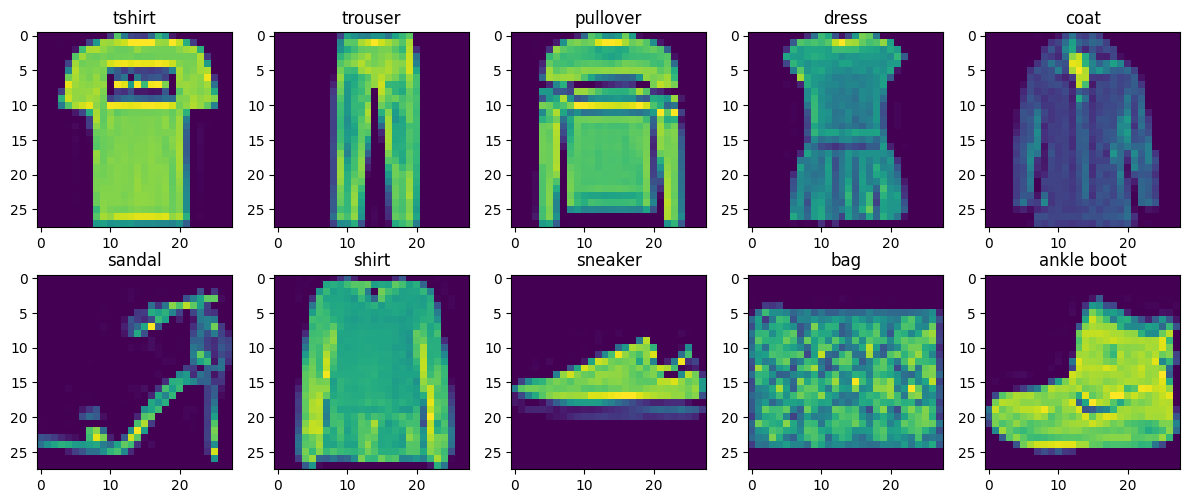

In [68]:
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 100

class_indices = y.unique()
class_indices = list(class_indices)
class_indices.sort()

for i in class_indices:

    plt.subplot(2,5, int(i) + 1)
    img = x[y == i].iloc[0].to_numpy().reshape(28,28)
    plt.imshow(img)
    plt.title(classes[int(i)])

plt.tight_layout()

In [69]:
y = y.astype("int")

In [70]:
x_train , x_test , y_train, y_test = train_test_split(x/255.0, y, test_size=0.2, random_state=0)

In [71]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [72]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [73]:
def get_model():
  model = Sequential()
  model.add(Flatten(input_shape=(x_train.shape[1],)))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [74]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')-logs.get("val_accuracy")) > 0.01:
      print("\nValidation accuracy fell below 1% of training accuracy. Cancelling Training!!!")
      self.model.stop_training = True

callbacks = myCallback()

model = get_model()
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test, y_test),callbacks=[callbacks])

Epoch 1/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7671 - loss: 0.6667 - val_accuracy: 0.8561 - val_loss: 0.3966
Epoch 2/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8584 - loss: 0.3899 - val_accuracy: 0.8658 - val_loss: 0.3611
Epoch 3/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8751 - loss: 0.3383 - val_accuracy: 0.8822 - val_loss: 0.3305
Epoch 4/10
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8805 - loss: 0.3220 - val_accuracy: 0.8740 - val_loss: 0.3598
Epoch 5/10
1749/1750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8888 - loss: 0.2965
Validation accuracy fell below 1% of training accuracy. Cancelling Training!!!
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8888 - loss: 0.2965 - val_accuracy: 0.8750 - val_loss: 0.3437


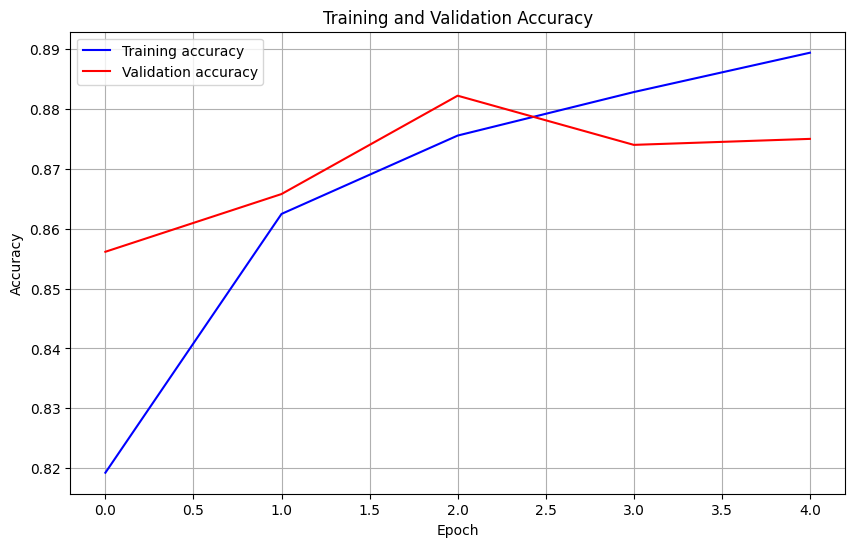

In [75]:
import matplotlib.pyplot as plt

# Get accuracy and validation accuracy from the history object
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')  # Use 'b-' for blue line
plt.plot(epochs, val_accuracy, 'r-', label='Validation accuracy') # Use 'r-' for red line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [76]:
model_classes = {'model' : model, 'classes' : classes}

In [77]:
import pickle as pkl
pkl.dump(model_classes, open('model_fashion_mnist.pkl', 'wb'))


In [78]:
loaded_model = pkl.load(open('model_fashion_mnist.pkl','rb'))

In [79]:
pred = loaded_model["model"].predict(x_train.iloc[1].to_numpy().reshape(1,784))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


In [80]:
loss, accuracy = loaded_model['model'].evaluate(x_test, y_test)

print(f"Loss on the test set: {loss}")
print(f"Accuracy on the test set: {accuracy}")

438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8791 - loss: 0.3340
Loss on the test set: 0.3436944782733917
Accuracy on the test set: 0.875


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


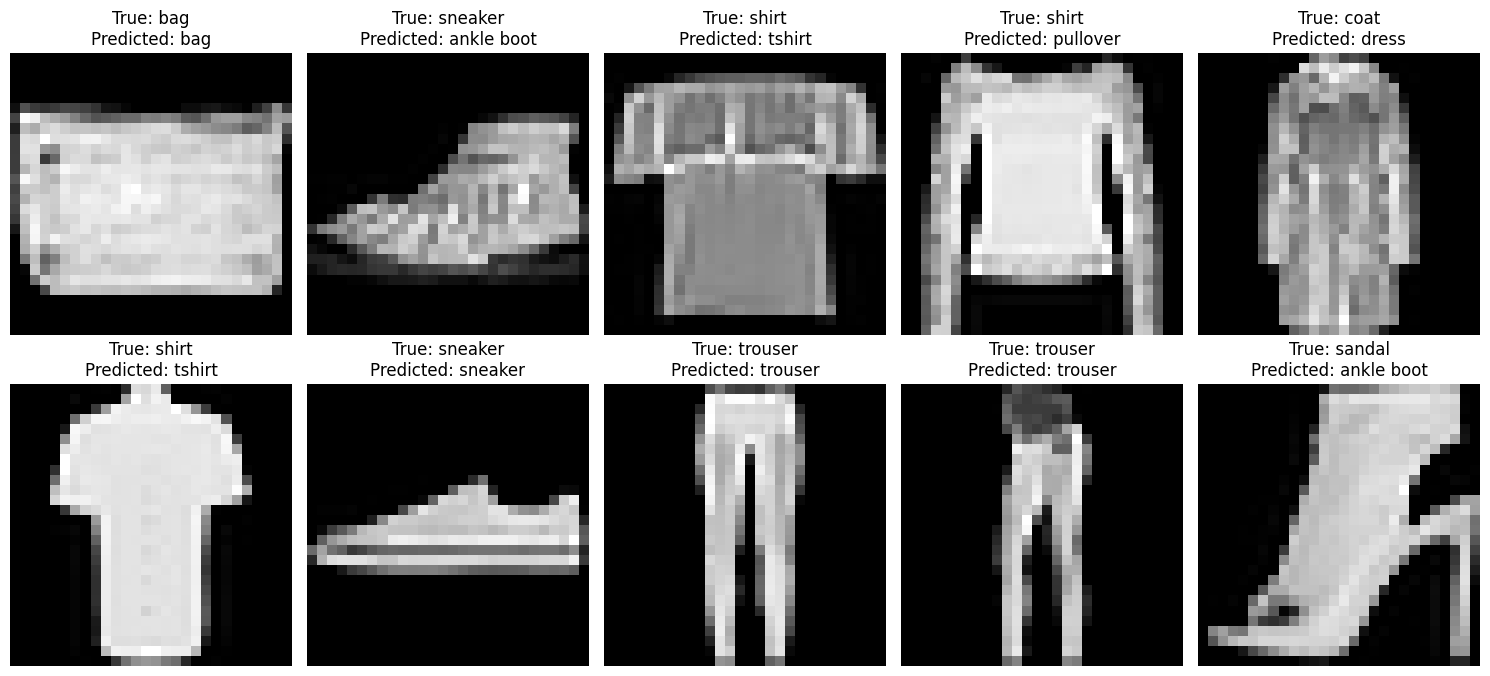

In [81]:
import random

# Get a few random indices from the test set
num_samples_to_show = 10
random_indices = random.sample(range(len(x_test)), num_samples_to_show)

plt.figure(figsize=(15, 7))

for i, idx in enumerate(random_indices):
    # Get the image, true label, and predicted label
    img = x_test.iloc[idx].to_numpy().reshape(28, 28)
    true_class_index = y_test.iloc[idx]
    true_class_name = loaded_model['classes'][true_class_index]

    # Make a prediction for this image
    pred = loaded_model["model"].predict(x_test.iloc[idx].to_numpy().reshape(1, 784))
    predicted_class_index = np.argmax(pred[0])
    predicted_class_name = loaded_model['classes'][predicted_class_index]

    # Plot the image
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_class_name}\nPredicted: {predicted_class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()